# Especificación erronea del modelo

Particionemos el modelo de regresión lineal múltiple $\pmb{y}=\pmb{X}\pmb{ \beta }+\pmb{\epsilon}$ en la siguiente manera

\begin{align*}
\pmb{y}&=\pmb{X}\pmb{ \beta }+\pmb{\epsilon}
\\
&= \left(\pmb{X}_1,\,\pmb{X}_2 \right)\left(\begin{matrix} \pmb{\beta}_1 \\ \pmb{\beta}_2 \end{matrix}\right)
+\pmb{\epsilon}
\\
&=\pmb{X}_1\pmb{\beta}_1 + \pmb{X}_2\pmb{\beta}_2 +\pmb{\epsilon} 
\end{align*}

Si realizamos inferencia sin incluir $\pmb{X}_2\pmb{\beta}_2$ cuando los datos provienen del modelo con $\pmb{\beta}_2\neq \pmb{0}$ entonces decimos que estamos subajustando (underfitting). Si incluimos $\pmb{X}_2\pmb{\beta}_2$ cuando los datos provienen del modelo con $\pmb{\beta}_2 = \pmb{0}$ decimos que estamos sobreajustando (overfitting).

Esto puede ser visualizado en el ejemplo de regresión polinomial.

In [1]:
using Distributions
y = [ 1.0 + x + 3.0*x^2 for x in -1:0.05:1 ] .+ rand(Normal(),41)
x = collect(-1:0.05:1)
X = zeros(41,7) # Matriz de ceros para construir X
for i in 1:41
    X[i,:] = [ 1, x[i], x[i]^2, x[i]^3, x[i]^4, x[i]^5, x[i]^6 ] # iteramos para construir renglones de X
end
X_1 = X[:,1:2];

In [2]:
using Plots, Measures #, Plots.PlotMeasures # Paquete para producir imágenes
default(size = (900, 400))
f(x) = 1.0 + x + 3.0*x^2 # Media cuadrática verdadera
β_u = ( X_1' * X_1)^(-1) * X_1' * y
β_o = ( X' * X)^(-1) * X' * y;

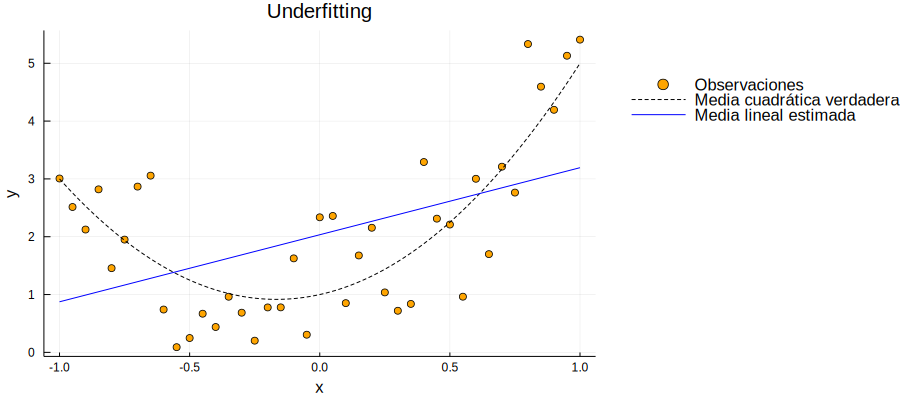

In [3]:
# Underfitting
f_u(x) = β_u[1] + β_u[2]*x # Media lineal dada por máxima verosimilitud al subestimar modelo cuadrático
mesh = collect(-1.0:1.0/100.0:1.0)
scatter(x,y,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media cuadrática verdadera")
plot!(mesh,f_u.(mesh), color = :blue, label="Media lineal estimada", legend=:outertopright, right_margin=10mm, foreground_color_legend = nothing)
ylabel!("y")
xlabel!("x")
title!("Underfitting")

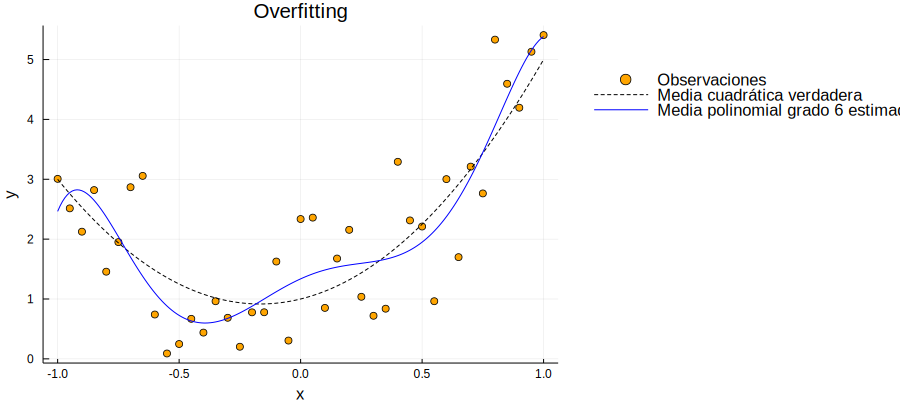

In [4]:
# Overfitting
f_o(x) = β_o[1] + β_o[2]*x + β_o[3]*x^2 + β_o[4]*x^3 + β_o[5]*x^4 + β_o[6]*x^5 + β_o[7]*x^6  # Media polinomial de grado 6 dada por máxima verosimilitud al subestimar modelo cuadrático
mesh = collect(-1.0:1.0/100.0:1.0)
scatter(x,y,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media cuadrática verdadera")
plot!(mesh,f_o.(mesh), color = :blue, label="Media polinomial grado 6 estimada", legend=:outertopright, right_margin=10mm, foreground_color_legend = nothing)
ylabel!("y")
xlabel!("x")
title!("Overfitting")

# Ortogonalización 

Recordemos que al considerar dos modelos:
\begin{equation*}
\pmb{y}=\pmb{X}_1 \pmb{\beta}_1^\star  + \pmb{\epsilon}^\star
\end{equation*}
y 
\begin{equation*}
\pmb{y}= \pmb{X}_1 \pmb{\beta}_1 + \pmb{X}_2 \pmb{\beta}_2  + \pmb{\epsilon}
\end{equation*}

no se tiene necesariamente que los estimadores OLS satsifacen $\hat{\pmb{\beta}}_1^\star = \hat{\pmb{\beta}}_1$. Observemos que si usamos el modelo con $\pmb{\beta}_1^\star$ cuando el modelo verdadero es el que contiene $\pmb{\beta}_1$ y $\pmb{\beta}_2$ en las ecuaciones anteriores, se tiene que

\begin{align*}
\esp{\pmb{\beta}_1^\star} &= (\pmb{X}_1'\pmb{X}_1)^{-1}\pmb{X}_1'\esp{y}
\\ & = (\pmb{X}_1'\pmb{X}_1)^{-1}\pmb{X}_1'\left( \pmb{X}_1 \pmb{\beta}_1 + \pmb{X}_2 \pmb{\beta}_2  \right)
\\ & = \pmb{\beta}_1 + (\pmb{X}_1'\pmb{X}_1)^{-1}\pmb{X}_1' \pmb{X}_2 \pmb{\beta}_2 
\end{align*}

por lo que la estimación de $\pmb{\beta}_1$ se ve afectada por $\pmb{X}_2$ a menos que $\pmb{X}_1' \pmb{X}_2 = \pmb{0}$. En el siguiente teorema vemos que si $\pmb{X}_1' \pmb{X}_2 = \pmb{0}$ entonces $\hat{\pmb{\beta}}_1^\star$ y $\hat{\pmb{\beta}}_1$ más que tener el mismo valor esperado, son iguales.

**Teorema** 
Si $\pmb{X}_1' \pmb{X}_2 = \pmb{0}$ entonces $\pmb{\beta}_1$, en el modelo completo $\pmb{y}= \pmb{X}_1 \pmb{\beta}_1 + \pmb{X}_2 \pmb{\beta}_2  + \pmb{\epsilon}$, es igual a $\pmb{\beta}_1^\star$, en el modelo reducido $\pmb{y}=\pmb{X}_1 \pmb{\beta}_1^\star  + \pmb{\epsilon}^\star$.

Antes de proceder a la demostración enunciamos el siguiente Lemma para trabajar con la inversión de matrices expresadas en bloques  

**Lemma**
Si \begin{equation*} \pmb{A}=\left( \begin{matrix} \pmb{A}_{1,2} & \pmb{A}_{1,2}  
\\
\pmb{A}_{2,1} & \pmb{A}_{2,2}
\end{matrix} \right) \end{equation*}
es no singular, simétrica y tal que $\pmb{A}_{1,1}^{-1}$ existe, y $\pmb{B}=\pmb{A}_{2,2}- \pmb{A}_{2,1}\pmb{A}_{1,1}^{-1} \pmb{A}_{1,2}$ es invertible, entonces

\begin{equation*}
\pmb{A}^{-1}=\left(
\begin{matrix}
\pmb{A}_{1,1}^{-1} + \pmb{A}_{1,1}^{-1}\pmb{A}_{1,2}\pmb{B}^{-1}\pmb{A}_{2,1}\pmb{A}_{1,1}^{-1}
& -\pmb{A}_{1,1}^{-1} \pmb{A}_{1,2}\pmb{B}^{-1}
\\
-\pmb{B}^{-1}\pmb{A}_{2,1}\pmb{A}_{1,1}^{-1}
&
\pmb{B}^{-1}
\end{matrix}
\right)
\end{equation*}

**Prueba del teorema**

De $\hat{\pmb{\beta}}=(\pmb{X}'\pmb{X})^{}-1\pmb{X}'\pmb{y}$ se sigue que
\begin{equation*}
\left( \begin{matrix} \hat{\pmb{\beta}}_1 \\ \hat{\pmb{\beta}}_2 \end{matrix} \right) =
\left(
\begin{matrix}
\pmb{X}_1'\pmb{X}_1 & \pmb{X}_1'\pmb{X}_2
\\
\pmb{X}_2'\pmb{X}_1 & \pmb{X}_2'\pmb{X}_2
\end{matrix}
\right)^{-1}
\left(
\begin{matrix}
\pmb{X}_1' \pmb{y}
\\
\pmb{X}_2' \pmb{y}
\end{matrix}
\right)
\end{equation*}

Usando el lemma anterior tenemos que
\begin{align*}
\hat{\pmb{\beta}}_1 = \left( \left( \pmb{X}_1'\pmb{X}_1 \right)^{-1} + 
\left( \pmb{X}_1'\pmb{X}_1 \right)^{-1} \pmb{X}_1'\pmb{X}_2\pmb{B}^{-1}
\pmb{X}_2'\pmb{X}_1 \left( \pmb{X}_1'\pmb{X}_1 \right)^{-1} \right) \pmb{X}_1'\pmb{y} -
\left( \pmb{X}_1'\pmb{X}_1 \right)^{-1}\pmb{X}_1'\pmb{X}_2\pmb{B}^{-1}\pmb{X}_2'\pmb{y}
\end{align*}
Por lo que $\pmb{X}_1'\pmb{X}_2=\pmb{0}$ implica
\begin{equation*}
\hat{\pmb{\beta}}_1 = \left( \pmb{X}_1'\pmb{X}_1 \right)^{-1}\pmb{X}_1'\pmb{y} =
\hat{\pmb{\beta}}_1^\star
\end{equation*}

El resultado anterior será de ultilidad para realizar pruebas de hipótesis.